In [1]:
using DifferentialEquations
using Plots
using Flux
using JLD

In [3]:
data_points = 100
time = 1.0

k = 300
c = 5
p = [c , k]
ϕ₀ = [1]
dϕ₀ = [0]
g = 9.81
tspan = (0.0,1)

dt = time / data_points # define the timestep by how much the data points we want and the time.

0.01

In [4]:
#Define the problem
simplependulum(du , u , p , t) = - p[1]*du - p[2]*u

simplependulum (generic function with 1 method)

In [5]:
function solveODE(p,tspan)
    
    prob = SecondOrderODEProblem(simplependulum, dϕ₀, ϕ₀, tspan ,p)
    sol = solve(prob , DP5() , saveat=dt)
    
    return sol
end

solveODE (generic function with 1 method)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\15801\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


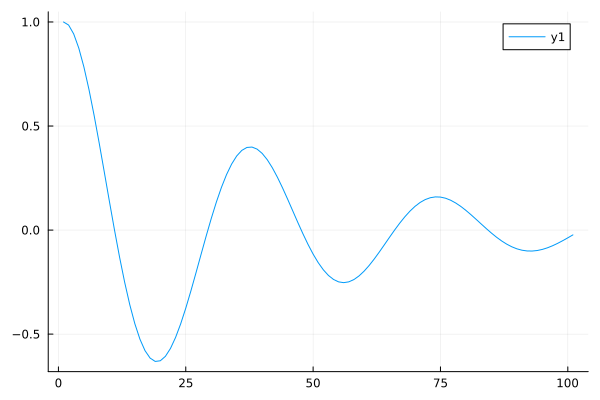

In [7]:
data = zeros( data_points+1 )
data_p = zeros( data_points+1 )
time = [tspan , dt]

sol = solveODE(p,tspan)
for j in 1:length(sol) 
    data[j] = sol[j][2]
    data_p[j] = sol[j][1]
end

plot(data)

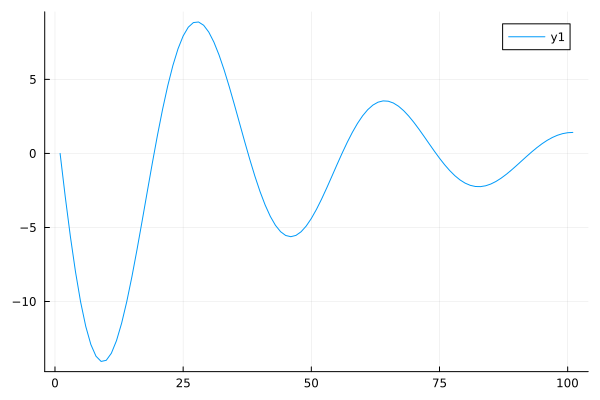

In [9]:
plot(data_p)

In [21]:
save("data.jld", "data", data)
save("time.jld", "data", time)